In [2]:
#work,Car Fuel Consuption
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数

In [3]:
#excelで，から．に変換した．本来はPandasとかで行う？
df_measurement = pd.read_csv("../car-consume/measurements.csv")

display(df_measurement.head())
df_measurement.describe()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun,refill liters
count,388.000000,388.000000,388.000000,376.000000,388.000000,388.000000,388.000000,388.000000,13.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474,37.115385
std,22.667837,1.033172,13.598524,1.010455,6.991542,0.267443,0.329677,0.275441,8.587282
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000,10.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000,37.600000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000,38.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000,39.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000,45.000000


In [5]:
df_measurement.count()#欠損の確認

distance         388
consume          388
speed            388
temp_inside      376
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

In [8]:
#Temp_insideを補完する．
ave = df_measurement["temp_inside"].mean()
df_measurement["temp_inside"] = df_measurement["temp_inside"].fillna(ave)
df_measurement.count()

distance         388
consume          388
speed            388
temp_inside      388
temp_outside     388
specials          93
gas_type         388
AC               388
rain             388
sun              388
refill liters     13
refill gas        13
dtype: int64

In [9]:
df_measurement["gas_type"]=df_measurement["gas_type"].replace({"E10":0,"SP98":1})

df_measurement.head(10)

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,0,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,0,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,0,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,0,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,0,0,0,0,NaN,NaN
5,8.3,6.4,50,21.5,10,NaN,0,0,0,0,NaN,NaN
6,7.8,4.4,43,21.5,11,NaN,0,0,0,0,NaN,NaN
7,12.3,5.0,40,21.5,6,NaN,0,0,0,0,NaN,NaN
8,4.9,6.4,26,21.5,4,NaN,0,0,0,0,NaN,NaN
9,11.9,5.3,30,21.5,9,NaN,0,0,0,0,NaN,NaN


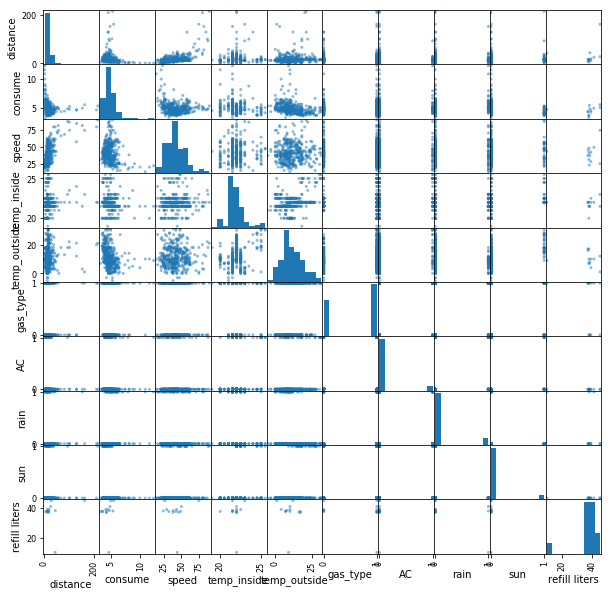

In [10]:
pd.plotting.scatter_matrix(df_measurement,figsize=(10,10))
plt.show()

In [11]:
df_measurement.corr()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,refill liters
distance,1.000000,-0.128967,0.562299,0.075178,0.088175,-0.053411,-0.025738,-0.019791,0.081120,0.132852
consume,-0.128967,1.000000,-0.227866,-0.160623,-0.320811,-0.015327,0.096591,0.248118,-0.170667,0.100868
speed,0.562299,-0.227866,1.000000,0.059293,0.015411,-0.097360,-0.035408,0.009489,0.081618,0.049673
temp_inside,0.075178,-0.160623,0.059293,1.000000,0.359500,0.010198,0.297376,-0.036937,0.242248,0.034128
temp_outside,0.088175,-0.320811,0.015411,0.359500,1.000000,0.148705,0.167562,-0.186315,0.346903,-0.084867
gas_type,-0.053411,-0.015327,-0.097360,0.010198,0.148705,1.000000,0.105285,0.060328,0.022761,-0.238081
AC,-0.025738,0.096591,-0.035408,0.297376,0.167562,0.105285,1.000000,0.242915,0.088598,NaN
rain,-0.019791,0.248118,0.009489,-0.036937,-0.186315,0.060328,0.242915,1.000000,-0.112650,-0.494501
sun,0.081120,-0.170667,0.081618,0.242248,0.346903,0.022761,0.088598,-0.112650,1.000000,NaN
refill liters,0.132852,0.100868,0.049673,0.034128,-0.084867,-0.238081,NaN,-0.494501,NaN,1.000000


<function matplotlib.pyplot.show>

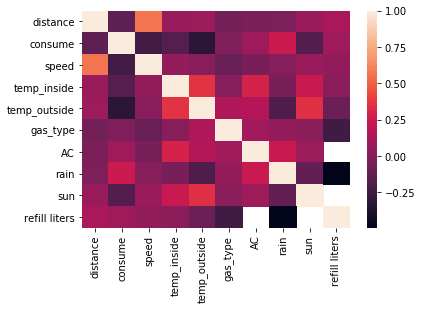

In [12]:
sns.heatmap(df_measurement.corr())
plt.show

In [17]:
# 係数を求める
y = df_measurement["consume"].values
X = df_measurement[['speed', 'temp_outside', 'rain']].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]
w3 = regr.coef_[2]

In [18]:
# 変数の設定
x1 = df_measurement["speed"]
x2 = df_measurement["temp_outside"]
x3 = df_measurement["rain"]
y = df_measurement["consume"]

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2 + w3* x3
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, w3 = {:.3f}, 二乗誤差 = {:.3f}'.format(w0, w1, w2, w3, squared_error))

w0 = 6.024, w1 = -0.017, w2 = -0.041, w3 = 0.621, 二乗誤差 = 167.210


In [19]:
# 値を予測
y_pred = regr.predict(X)

# MSEを計算
mse = mean_squared_error(y, y_pred) 
print("MSE = %s"%round(mse,3) )  

# MAEを計算
mae = mean_absolute_error(y, y_pred) 
print("MAE = %s"%round(mae,3) )

# RMSEを計算
rmse = np.sqrt(mse)
print("RMSE = %s"%round(rmse, 3) )

MSE = 0.862
MAE = 0.619
RMSE = 0.928
